In [1]:
#Dependencies
import pandas as pd
import numpy as np
import os as o
import csv
import sys
import numpy as np
import wbpy
import datetime as dt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt

#OutPut Files
Init = o.path.join('Output data', 'Init.csv')
Pred = o.path.join('Output data', 'Pred.csv')
PredAndInit = o.path.join('Output data', 'PredAndInit.csv')

#Climate API declaration
c_api = wbpy.ClimateAPI()

In [2]:
#https://pypi.org/project/wbpy/
#Grab Climate Data (Average Temperature in F, Average Anual Precipitation in mm)

#Delclare Variables
climateData = pd.DataFrame(columns=['Country', 'Year', 'precipitation', 'temperature'])
c_api = wbpy.ClimateAPI()
countries = ['BR', 'CO', 'DO', 'SV', 'ET', 'GT', 'HN', 'IN', 'TG', 'UG']
countryNames = {'BR': 'Brazil', 'CO': 'Colombia', 'DO': 'Dominican Republic', 'SV': 'El Salvador', 'ET': 'Ethiopia', 'GT': 'Guatemala', 'HN': 'Honduras', 'IN': 'India', 'TG': 'Togo', 'UG': 'Uganda'}

#Cycle/Save as DF
WeatherVariable = ['pr', 'tas']
for country in countries:
    #Temp in C, pr in mm
    avgAnualPrecip = c_api.get_instrumental(data_type='pr', interval="year", locations=[country])
    avgAnualTemp = c_api.get_instrumental(data_type='tas', interval="year", locations=[country])
    avgAnualPrecipDict = avgAnualPrecip.as_dict()
    avgAnualTempDict = avgAnualTemp.as_dict()
    for selectYear in range(1990, 2013):
        selectYear = str(selectYear)
        precipVal = avgAnualPrecipDict[country][selectYear]
        tempVal = avgAnualTempDict[country][selectYear]
        listToAdd = [countryNames[country], selectYear, precipVal, tempVal]
        rowToAdd = pd.DataFrame(np.array([listToAdd]), columns=['Country', 'Year', 'precipitation', 'temperature'])
        climateData = climateData.append(rowToAdd)
        climateData = climateData.reset_index(drop=True)
climateData.head()

,Country,Year,precipitation,temperature
0,Brazil,1990,136.72195,25.069971
1,Brazil,1991,141.17818,25.041132
2,Brazil,1992,141.7583,24.83469
3,Brazil,1993,140.83391,24.955845
4,Brazil,1994,149.33366,25.072952


In [3]:
#Load data from Kaggle



#Delclare Variables
file_names = ['disappearance', 'domestic-consumption', 'exports-calendar-year', 'exports-crop-year', 'gross-opening-stocks', 'imports', 'indicator-prices', 'inventories', 'prices-paid-to-growers', 're-exports', 'retail-prices', 'total-production']
df_names = ['file1', 'file2', 'file3', 'file4', 'file5', 'file6', 'file7', 'file8', 'file9', 'file10', 'file11', 'file12']
for item in range(12):
    file_name = f'data/{file_names[item]}.csv'
    
    exec('{} = pd.read_csv(file_name)'.format(df_names[item]))

#/// Exporting Countries ///#
    
file2 = pd.melt(file2, id_vars=['domestic_consumption'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
file2 = file2.rename(columns={"domestic_consumption": "Country", "variable": "Year", "value": "domestic_consumption"})    
    
file3 = pd.melt(file3, id_vars=['exports'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
file3 = file3.rename(columns={"exports": "Country", "variable": "Year", "value": "Export"})

file4 = pd.melt(file4, id_vars=['exports_crop_year'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
file4 = file4.rename(columns={"exports_crop_year": "Country", "variable": "Year", "value": "exports_crop_year"})

file5 = pd.melt(file5, id_vars=['gross_opening_stocks'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
file5 = file5.rename(columns={"gross_opening_stocks": "Country", "variable": "Year", "value": "gross_opening_stocks"})

file9 = pd.melt(file9, id_vars=['prices_paid_to_growers'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
file9 = file9.rename(columns={"prices_paid_to_growers": "Country", "variable": "Year", "value": "prices_paid_to_growers"})

file12 = pd.melt(file12, id_vars=['total_production'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
file12 = file12.rename(columns={"total_production": "Country", "variable": "Year", "value": "total_production"})

#/// Importing Countries ///#

file1 = pd.melt(file1, id_vars=['disappearance'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
file1 = file1.rename(columns={"disappearance": "Country", "variable": "Year", "value": "disappearance"}) 

file6 = pd.melt(file6, id_vars=['imports'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
file6 = file6.rename(columns={"imports": "Country", "variable": "Year", "value": "imports"}) 

file8 = pd.melt(file8, id_vars=['inventories'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
file8 = file8.rename(columns={"inventories": "Country", "variable": "Year", "value": "inventories"}) 

file10 = pd.melt(file10, id_vars=['re-exports'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
file10 = file10.rename(columns={"re-exports": "Country", "variable": "Year", "value": "re-exports"}) 

file11 = pd.melt(file11, id_vars=['retail_prices'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
file11 = file11.rename(columns={"retail_prices": "Country", "variable": "Year", "value": "retail_prices"}) 

In [4]:
#Combine Export Data

merged_Exporting = file3.merge(file4, how='outer', left_on=["Country", "Year"], right_on=["Country","Year"])
merged_Exporting = merged_Exporting.merge(file5, how='outer', left_on=["Country", "Year"], right_on=["Country","Year"])
merged_Exporting = merged_Exporting.merge(file9, how='outer', left_on=["Country", "Year"], right_on=["Country","Year"])
merged_Exporting = merged_Exporting.merge(file12, how='outer', left_on=["Country", "Year"], right_on=["Country","Year"])
merged_Exporting = merged_Exporting.merge(climateData, how='outer', left_on=["Country", "Year"], right_on=["Country","Year"])
merged_Exporting.dropna(subset = ["prices_paid_to_growers"], inplace=True)
merged_Exporting = merged_Exporting.reset_index(drop=True)

#Combine Import Data

merged_Importing = file1.merge(file6, how='outer', left_on=["Country", "Year"], right_on=["Country","Year"])
merged_Importing = merged_Importing.merge(file8, how='outer', left_on=["Country", "Year"], right_on=["Country","Year"])
merged_Importing = merged_Importing.merge(file10, how='outer', left_on=["Country", "Year"], right_on=["Country","Year"])
merged_Importing = merged_Importing.merge(file11, how='outer', left_on=["Country", "Year"], right_on=["Country","Year"])

In [5]:
#Add import data as a variable to export

#Grab Aggregate of Import Data
Imports = merged_Importing[['Country', 'Year', 'imports']]
ImportDemand = Imports.groupby(['Year']).imports.sum().to_frame(name = 'Total Imports').reset_index()
#Grab Aggregate of Re-export Data
re_exports = file10.rename(columns={"re-exports": "reExports"})
re_exports = re_exports.groupby(['Year']).reExports.sum().to_frame(name = 'reExports').reset_index()
#Subtract re-exports from Exports to account for estimated importing demand
TrueImports = ImportDemand.merge(re_exports, how='inner', on=["Year"])
TrueImports['Estimated Demand'] = TrueImports['Total Imports'] - TrueImports['reExports']
#Seclude Estimated Import Demand
TrueImports = TrueImports[['Year', 'Estimated Demand']]
#Combine Data
TotalData = merged_Exporting.merge(TrueImports, how='outer', on=["Year"])

#Grab average retail prices as United States prices are lacking
AveragePriceUSD = merged_Importing.groupby(['Year']).retail_prices.mean().to_frame(name = 'Average Price').reset_index()
AveragePriceUSD = AveragePriceUSD[['Year', 'Average Price']]

#Combine Data
TotalData = TotalData.merge(AveragePriceUSD, how='outer', on=["Year"])

#total crop export and gross stocks are reactive and needs removed
TotalData = TotalData.drop(columns=['exports_crop_year', 'gross_opening_stocks'])
TotalData

#Look at values 2007 and after do to market crash
TotalData['Year'] = TotalData['Year'].astype(int)
TotalData['precipitation'] = TotalData['precipitation'].astype(float)
TotalData['temperature'] = TotalData['temperature'].astype(float)
DataToPredict = TotalData[TotalData.Year > 2012]
DataToPredict = DataToPredict.reset_index(drop=True)
TotalData = TotalData[TotalData.Year <= 2012]
TotalData.corr()

,Year,Export,prices_paid_to_growers,total_production,precipitation,temperature,Estimated Demand,Average Price
Year,1.000000,0.075187,0.457936,0.081429,0.092210,0.107809,0.944236,0.505934
Export,0.075187,1.000000,0.110705,0.970294,0.298997,0.072903,0.080068,0.029169
prices_paid_to_growers,0.457936,0.110705,1.000000,0.097343,0.332831,-0.127000,0.433313,0.765651
total_production,0.081429,0.970294,0.097343,1.000000,0.194139,0.087456,0.088490,0.041882
precipitation,0.092210,0.298997,0.332831,0.194139,1.000000,0.042226,0.083091,0.068775
temperature,0.107809,0.072903,-0.127000,0.087456,0.042226,1.000000,0.078067,-0.005364
Estimated Demand,0.944236,0.080068,0.433313,0.088490,0.083091,0.078067,1.000000,0.484502
Average Price,0.505934,0.029169,0.765651,0.041882,0.068775,-0.005364,0.484502,1.000000


In [6]:
#Predicting precipitation and temp values for 2013 til 2018
IndependentLinearValues = pd.DataFrame(columns=['Country', 'Year', 'precipitation', 'temperature'])
TotalData1 = TotalData
import numpy as np
predictionYears = [2013, 2014, 2015, 2016, 2017, 2018]

#Linear regression with independent Variables
TotalData1['Year'] = TotalData1[['Year']].astype(int)
X = TotalData1[['Year']]
Y = TotalData1[['precipitation', 'temperature']].astype(float)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

training_score = regr.score(X_train, Y_train)
print(f"Training Score: {training_score}")
testing_score = regr.score(X_test, Y_test)
print(f"Testing Score: {testing_score}")

#Cycle through each year for given country
UniqueCountryExporting = TotalData.Country.unique()
for country in UniqueCountryExporting:
    for year in predictionYears:
        predictedValues = regr.predict([[year]])
        predictedValues = list(predictedValues[0])
        predictedlist = [country, year]
        for val in list(predictedValues):
            predictedlist.append(round(val, 6))
        rowToAdd = pd.DataFrame(np.array([predictedlist]), columns=['Country', 'Year', 'precipitation', 'temperature'])
        IndependentLinearValues = IndependentLinearValues.append(rowToAdd)
IndependentLinearValues = IndependentLinearValues.reset_index(drop=True)

#Combining precipitation and Temperature for 2013-2018 with actual data
DataToPredict['Year'] = DataToPredict['Year'].astype(int)
IndependentLinearValues['Year'] = IndependentLinearValues['Year'].astype(int)
OriginalDataAndPredictedTempPrec = DataToPredict.merge(IndependentLinearValues, how='outer', left_on=["Country", "Year"], right_on=["Country","Year"])
OriginalDataAndPredictedTempPrec = OriginalDataAndPredictedTempPrec.drop(columns=['precipitation_x', 'temperature_x', 'total_production'])
OriginalDataAndPredictedTempPrec = OriginalDataAndPredictedTempPrec.rename(columns={"precipitation_y": "precipitation", "temperature_y": "temperature"})
OriginalDataAndPredictedTempPrec.head()


Training Score: 0.0063350587604451
Testing Score: 0.008783612708224864


,Country,Year,Export,prices_paid_to_growers,Estimated Demand,Average Price,precipitation,temperature
0,Brazil,2013,31650.562945,2.068699,126661.968903,14.935352,144.961968,24.869393
1,Colombia,2013,9669.907367,2.514539,126661.968903,14.935352,144.961968,24.869393
2,Dominican Republic,2013,64.723312,3.112084,126661.968903,14.935352,144.961968,24.869393
3,El Salvador,2013,1102.743425,2.103276,126661.968903,14.935352,144.961968,24.869393
4,Ethiopia,2013,2870.075248,1.618110,126661.968903,14.935352,144.961968,24.869393


In [7]:
CompletedFile = pd.concat([TotalData,OriginalDataAndPredictedTempPrec])
CompletedFile = CompletedFile.reset_index(drop=True)
CompletedFile

,Country,Year,Export,prices_paid_to_growers,total_production,precipitation,temperature,Estimated Demand,Average Price
0,Brazil,1990,16935.787600,0.984254,27285.6286,136.722,25.07,87649.966535,10.386313
1,Colombia,1990,13943.870000,1.534724,14396.0000,194.27,24.6814,87649.966535,10.386313
2,Dominican Republic,1990,535.207000,1.458168,880.0620,117.248,24.6892,87649.966535,10.386313
3,El Salvador,1990,2509.873000,1.116194,2464.8640,126.008,25.0705,87649.966535,10.386313
4,Ethiopia,1990,1074.101000,1.348565,2909.4510,57.8451,23.1606,87649.966535,10.386313
...,...,...,...,...,...,...,...,...,...
285,Guatemala,2018,3327.489656,2.697022,NaN,148.177081,24.93974,95392.056339,13.651845
286,Honduras,2018,7143.884471,1.855291,NaN,148.177081,24.93974,95392.056339,13.651845
287,India,2018,5967.224604,2.081708,NaN,148.177081,24.93974,95392.056339,13.651845
288,Togo,2018,111.044350,1.565731,NaN,148.177081,24.93974,95392.056339,13.651845


In [8]:
#Predicting Dependent Variables
DependentLinearValuePredictions = pd.DataFrame(columns=['Country', 'Year', 'Export', 'prices_paid_to_growers', 'precipitation', 'temperature', 'Estimated Demand', 'Average Price'])
TotalData1 = CompletedFile
predictionYears = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

X = TotalData1[['Export', 'prices_paid_to_growers', 'precipitation', 'temperature', 'Estimated Demand']].astype(float)
Y = TotalData1[['Average Price']].astype(float)
    
#Linear regression with independent variables that interact with eachother.
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly.fit_transform(X)
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
training_score = regr.score(X_train, Y_train)
    
print(f"Training Score: {training_score}")
testing_score = regr.score(X_test, Y_test)
print(f"Testing Score: {testing_score}")
    
#Cycle through each year for given country
UniqueCountryExporting = TotalData.Country.unique()
for country in UniqueCountryExporting:
    for year in predictionYears:
        selectedCountryPredictedYearDF = TotalData1.loc[TotalData1['Country'] == country]
        selectedCountryPredictedYearDF = selectedCountryPredictedYearDF.loc[selectedCountryPredictedYearDF['Year'].astype(int) == year]
        predictedValues = regr.predict([[float(selectedCountryPredictedYearDF.iloc[0]['Export']), float(selectedCountryPredictedYearDF.iloc[0]['prices_paid_to_growers']), float(selectedCountryPredictedYearDF.iloc[0]['precipitation']), float(selectedCountryPredictedYearDF.iloc[0]['temperature']), float(selectedCountryPredictedYearDF.iloc[0]['Estimated Demand'])]])
        predictedValues = list(predictedValues[0])
        predictedlist = [country, year, float(selectedCountryPredictedYearDF.iloc[0]['Export']), float(selectedCountryPredictedYearDF.iloc[0]['prices_paid_to_growers']), float(selectedCountryPredictedYearDF.iloc[0]['precipitation']), float(selectedCountryPredictedYearDF.iloc[0]['temperature']), float(selectedCountryPredictedYearDF.iloc[0]['Estimated Demand'])]
        for val in list(predictedValues):
            predictedlist.append(round(val, 6))
        rowToAdd = pd.DataFrame(np.array([predictedlist]), columns=['Country', 'Year', 'Export', 'prices_paid_to_growers', 'precipitation', 'temperature', 'Estimated Demand', 'Average Price'])
        DependentLinearValuePredictions = DependentLinearValuePredictions.append(rowToAdd)
WithWeather = DependentLinearValuePredictions.reset_index(drop=True)

WithWeather.head()

Training Score: 0.5898428800655341
Testing Score: 0.563415915538956


,Country,Year,Export,prices_paid_to_growers,precipitation,temperature,Estimated Demand,Average Price
0,Brazil,1990,16935.7876003,0.984253863,136.72195,25.069971,87649.96653479998,10.902678
1,Brazil,1991,21182.7614023,0.789048565,141.17818,25.041132,83074.80877780002,10.510551
2,Brazil,1992,18790.7192021,0.8034613690000001,141.7583,24.83469,88095.04391310003,10.584255
3,Brazil,1993,17837.7479992,0.975950331,140.83391,24.955845,85202.70934419998,10.796929
4,Brazil,1994,17273.1476003,2.207448124,149.33366,25.072952,79975.16169680002,12.511845


In [9]:
#Predicting Dependent Variables
DependentLinearValuePredictions = pd.DataFrame(columns=['Country', 'Year', 'Export', 'prices_paid_to_growers', 'Estimated Demand', 'Average Price'])
TotalData1 = CompletedFile
predictionYears = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

X = TotalData1[['Export', 'prices_paid_to_growers', 'Estimated Demand']].astype(float)
Y = TotalData1[['Average Price']].astype(float)
    
#Linear regression with independent variables that interact with eachother.
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly.fit_transform(X)
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
training_score = regr.score(X_train, Y_train)
    
print(f"Training Score: {training_score}")
testing_score = regr.score(X_test, Y_test)
print(f"Testing Score: {testing_score}")
    
#Cycle through each year for given country
UniqueCountryExporting = TotalData.Country.unique()
for country in UniqueCountryExporting:
    for year in predictionYears:
        selectedCountryPredictedYearDF = TotalData1.loc[TotalData1['Country'] == country]
        selectedCountryPredictedYearDF = selectedCountryPredictedYearDF.loc[selectedCountryPredictedYearDF['Year'].astype(int) == year]
        predictedValues = regr.predict([[float(selectedCountryPredictedYearDF.iloc[0]['Export']), float(selectedCountryPredictedYearDF.iloc[0]['prices_paid_to_growers']), float(selectedCountryPredictedYearDF.iloc[0]['Estimated Demand'])]])
        predictedValues = list(predictedValues[0])
        predictedlist = [country, year, float(selectedCountryPredictedYearDF.iloc[0]['Export']), float(selectedCountryPredictedYearDF.iloc[0]['prices_paid_to_growers']), float(selectedCountryPredictedYearDF.iloc[0]['Estimated Demand'])]
        for val in list(predictedValues):
            predictedlist.append(round(val, 6))
        rowToAdd = pd.DataFrame(np.array([predictedlist]), columns=['Country', 'Year', 'Export', 'prices_paid_to_growers', 'Estimated Demand', 'Average Price'])
        DependentLinearValuePredictions = DependentLinearValuePredictions.append(rowToAdd)
WithoutWeather = DependentLinearValuePredictions.reset_index(drop=True)

WithoutWeather.head()

Training Score: 0.5415861930662085
Testing Score: 0.5796611410052668


,Country,Year,Export,prices_paid_to_growers,Estimated Demand,Average Price
0,Brazil,1990,16935.7876003,0.984253863,87649.96653479998,10.746161
1,Brazil,1991,21182.7614023,0.789048565,83074.80877780002,10.364274
2,Brazil,1992,18790.7192021,0.8034613690000001,88095.04391310003,10.499661
3,Brazil,1993,17837.7479992,0.975950331,85202.70934419998,10.677569
4,Brazil,1994,17273.1476003,2.207448124,79975.16169680002,12.337424


In [10]:
data = [CompletedFile["Year"], CompletedFile["Average Price"], WithoutWeather["Average Price"], WithWeather["Average Price"], WithoutWeather["Average Price"], WithWeather["Average Price"]]
headers = ["Year", "Original", "Without", "With"]
comparisons = pd.concat(data, axis=1, keys=headers)
comparisons

,Year,Original,Without,With
0,1990,10.386313,10.746161,10.902678
1,1990,10.386313,10.364274,10.510551
2,1990,10.386313,10.499661,10.584255
3,1990,10.386313,10.677569,10.796929
4,1990,10.386313,12.337424,12.511845
...,...,...,...,...
285,2018,13.651845,12.036043,12.069694
286,2018,13.651845,11.593711,11.5988
287,2018,13.651845,11.465291,11.458044
288,2018,13.651845,11.767207,11.770682


In [11]:
#Predicting Dependent Variables
DependentLinearValuePredictions = pd.DataFrame(columns=['Country', 'Year', 'Export', 'prices_paid_to_growers', 'precipitation', 'temperature', 'Estimated Demand', 'Average Price'])
TotalData1 = TotalData
predictionYears = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

X = TotalData1[['Export', 'prices_paid_to_growers', 'precipitation', 'temperature', 'Estimated Demand']].astype(float)
Y = TotalData1[['Average Price']].astype(float)
    
#Linear regression with independent variables that interact with eachother.
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly.fit_transform(X)
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
training_score = regr.score(X_train, Y_train)
    
print(f"Training Score: {training_score}")
testing_score = regr.score(X_test, Y_test)
print(f"Testing Score: {testing_score}")
    
#Cycle through each year for given country
UniqueCountryExporting = TotalData.Country.unique()
for country in UniqueCountryExporting:
    for year in predictionYears:
        selectedCountryPredictedYearDF = TotalData1.loc[TotalData1['Country'] == country]
        selectedCountryPredictedYearDF = selectedCountryPredictedYearDF.loc[selectedCountryPredictedYearDF['Year'].astype(int) == year]
        predictedValues = regr.predict([[float(selectedCountryPredictedYearDF.iloc[0]['Export']), float(selectedCountryPredictedYearDF.iloc[0]['prices_paid_to_growers']), float(selectedCountryPredictedYearDF.iloc[0]['precipitation']), float(selectedCountryPredictedYearDF.iloc[0]['temperature']), float(selectedCountryPredictedYearDF.iloc[0]['Estimated Demand'])]])
        predictedValues = list(predictedValues[0])
        predictedlist = [country, year, float(selectedCountryPredictedYearDF.iloc[0]['Export']), float(selectedCountryPredictedYearDF.iloc[0]['prices_paid_to_growers']), float(selectedCountryPredictedYearDF.iloc[0]['precipitation']), float(selectedCountryPredictedYearDF.iloc[0]['temperature']), float(selectedCountryPredictedYearDF.iloc[0]['Estimated Demand'])]
        for val in list(predictedValues):
            predictedlist.append(round(val, 6))
        rowToAdd = pd.DataFrame(np.array([predictedlist]), columns=['Country', 'Year', 'Export', 'prices_paid_to_growers', 'precipitation', 'temperature', 'Estimated Demand', 'Average Price'])
        DependentLinearValuePredictions = DependentLinearValuePredictions.append(rowToAdd)
WithWeatherBefore2012 = DependentLinearValuePredictions.reset_index(drop=True)

WithWeatherBefore2012.head()

Training Score: 0.646057386444679
Testing Score: 0.6687003774466258


,Country,Year,Export,prices_paid_to_growers,precipitation,temperature,Estimated Demand,Average Price
0,Brazil,1990,16935.7876003,0.984253863,136.72195,25.069971,87649.96653479998,10.485422
1,Brazil,1991,21182.7614023,0.789048565,141.17818,25.041132,83074.80877780002,10.069272
2,Brazil,1992,18790.7192021,0.8034613690000001,141.7583,24.83469,88095.04391310003,10.155502
3,Brazil,1993,17837.7479992,0.975950331,140.83391,24.955845,85202.70934419998,10.393153
4,Brazil,1994,17273.1476003,2.207448124,149.33366,25.072952,79975.16169680002,12.219018


In [12]:
#Predicting Dependent Variables
DependentLinearValuePredictions = pd.DataFrame(columns=['Country', 'Year', 'Export', 'prices_paid_to_growers', 'Estimated Demand', 'Average Price'])
TotalData1 = TotalData
predictionYears = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

X = TotalData1[['Export', 'prices_paid_to_growers', 'Estimated Demand']].astype(float)
Y = TotalData1[['Average Price']].astype(float)
    
#Linear regression with independent variables that interact with eachother.
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly.fit_transform(X)
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
training_score = regr.score(X_train, Y_train)
    
print(f"Training Score: {training_score}")
testing_score = regr.score(X_test, Y_test)
print(f"Testing Score: {testing_score}")
    
#Cycle through each year for given country
UniqueCountryExporting = TotalData.Country.unique()
for country in UniqueCountryExporting:
    for year in predictionYears:
        selectedCountryPredictedYearDF = TotalData1.loc[TotalData1['Country'] == country]
        selectedCountryPredictedYearDF = selectedCountryPredictedYearDF.loc[selectedCountryPredictedYearDF['Year'].astype(int) == year]
        predictedValues = regr.predict([[float(selectedCountryPredictedYearDF.iloc[0]['Export']), float(selectedCountryPredictedYearDF.iloc[0]['prices_paid_to_growers']), float(selectedCountryPredictedYearDF.iloc[0]['Estimated Demand'])]])
        predictedValues = list(predictedValues[0])
        predictedlist = [country, year, float(selectedCountryPredictedYearDF.iloc[0]['Export']), float(selectedCountryPredictedYearDF.iloc[0]['prices_paid_to_growers']), float(selectedCountryPredictedYearDF.iloc[0]['Estimated Demand'])]
        for val in list(predictedValues):
            predictedlist.append(round(val, 6))
        rowToAdd = pd.DataFrame(np.array([predictedlist]), columns=['Country', 'Year', 'Export', 'prices_paid_to_growers', 'Estimated Demand', 'Average Price'])
        DependentLinearValuePredictions = DependentLinearValuePredictions.append(rowToAdd)
WithoutWeatherBefore2012 = DependentLinearValuePredictions.reset_index(drop=True)

WithoutWeatherBefore2012.head()

Training Score: 0.6235673847184834
Testing Score: 0.5864427535350947


,Country,Year,Export,prices_paid_to_growers,Estimated Demand,Average Price
0,Brazil,1990,16935.7876003,0.984253863,87649.96653479998,10.351241
1,Brazil,1991,21182.7614023,0.789048565,83074.80877780002,9.899126
2,Brazil,1992,18790.7192021,0.8034613690000001,88095.04391310003,10.092132
3,Brazil,1993,17837.7479992,0.975950331,85202.70934419998,10.259094
4,Brazil,1994,17273.1476003,2.207448124,79975.16169680002,11.794766


In [13]:
import warnings
warnings.filterwarnings("ignore")
comparisons.head()
comparisonsOriginal = comparisons[['Year', 'Original']]

comparisonsWithout = comparisons[['Year', 'Without']]
comparisonsWithout['Year'] = comparisonsWithout['Year'].astype(int)
comparisonsWithout['Without'] = comparisonsWithout['Without'].astype(float)

comparisonsWith = comparisons[['Year', 'With']]
comparisonsWith['Year'] = comparisonsWith['Year'].astype(int)
comparisonsWith['With'] = comparisonsWith['With'].astype(float)


comparisonsOriginalAverage = comparisonsOriginal.groupby(['Year']).mean()
comparisonsOriginalAverage = comparisonsOriginalAverage.reset_index(drop=True)

comparisonsWithoutAverage = comparisonsWithout.groupby(['Year']).mean()
comparisonsWithoutAverage = comparisonsWithoutAverage.reset_index(drop=True)

comparisonsWithAverage = comparisonsWith.groupby(['Year']).mean()
comparisonsWithAverage = comparisonsWithAverage.reset_index(drop=True)

myYears = pd.DataFrame(comparisons.groupby(['Year']).Year)

data1 = [myYears[0], comparisonsOriginalAverage['Original'], comparisonsWithoutAverage["Without"], comparisonsWithAverage["With"]]
headers = ["Year", "Original", "Without", "With"]
ComparisonsAverage1990_2018 = pd.concat(data1, axis=1, keys=headers)
ComparisonsAverage1990_2018

,Year,Original,Without,With
0,1990,10.386313,11.575847,11.742850
1,1991,10.424156,11.668753,11.875289
2,1992,10.532955,13.068410,13.320737
3,1993,9.651529,11.986587,11.606838
4,1994,10.994954,12.715704,12.209954
5,1995,14.035005,13.725309,13.803061
6,1996,12.798802,12.006145,12.190457
7,1997,12.451908,12.882720,12.875503
8,1998,12.407758,13.572571,13.666475
9,1999,11.483759,11.412967,11.462312


In [14]:
import matplotlib.pyplot as plt


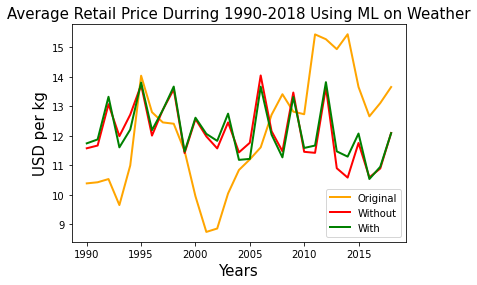

In [15]:

plt.plot( 'Year', 'Original', data=ComparisonsAverage1990_2018, marker='o', color='orange', markersize=0, linewidth=2)
plt.plot( 'Year', 'Without', data=ComparisonsAverage1990_2018, marker='o', color='red', markersize=0, linewidth=2)
plt.plot( 'Year', 'With', data=ComparisonsAverage1990_2018, marker='o', color='green', markersize=0, linewidth=2)
plt.title('Average Retail Price Durring 1990-2018 Using ML on Weather', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.ylabel('USD per kg', fontsize=15)
plt.legend()
plt.show()

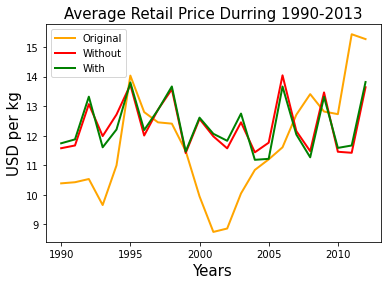

In [16]:
ComparisonsAverage1990_2013 = ComparisonsAverage1990_2018[ComparisonsAverage1990_2018.Year <= 2012]
plt.plot( 'Year', 'Original', data=ComparisonsAverage1990_2013, marker='o', color='orange', markersize=0, linewidth=2)
plt.plot( 'Year', 'Without', data=ComparisonsAverage1990_2013, marker='o', color='red', markersize=0, linewidth=2)
plt.plot( 'Year', 'With', data=ComparisonsAverage1990_2013, marker='o', color='green', markersize=0, linewidth=2)
plt.legend()
plt.title('Average Retail Price Durring 1990-2013', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.ylabel('USD per kg', fontsize=15)
plt.show()

In [17]:
# 2001 crash a result of increase lands for productions and a decrease in the value of the brazillian currency meaning that with prices paid to the farmers remaining relatively constant, they were selling more for less
#The 2011 increase resulted in a poor crop yeild in addition an increase in demand in sourthern and central Asia.